In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
sns.set_style()

In [2]:
# Search a database for north ans south countries 

In [3]:
#read the file 
dff_00 = (pd.read_excel('deaths2000.xls', skiprows=6, sheet_name='Deaths All ages'))
df_00=dff_00.copy()

dff_16 = (pd.read_excel('deaths2016.xls', skiprows=6, sheet_name='Deaths All ages'))
df_16=dff_16.copy()

In [4]:
df_00 = df_00.drop([df_00.columns[1],df_00.columns[2],df_00.columns[3], df_00.columns[6]], axis=1)

df_16 = df_16.drop([df_16.columns[1],df_16.columns[2],df_16.columns[3], df_16.columns[6]], axis=1)

In [5]:
df_00 = df_00.drop((df_00[df_00.Sex =='Persons'].index))
df_00=df_00.dropna(subset=["Sex"])

df_16 = df_16.drop((df_16[df_16.Sex =='Persons'].index))
df_16=df_16.dropna(subset=["Sex"])

In [6]:
df_00 = df_00.rename(columns={df_00.columns[1]: 'General_cause', df_00.columns[2]: 'Detailed_cause'})
df_16 = df_16.rename(columns={df_16.columns[1]: 'General_cause', df_16.columns[2]: 'Detailed_cause'})


In [7]:
df_00 = df_00.dropna(subset=["General_cause", "Detailed_cause"], how='all')

df_16 = df_16.dropna(subset=["General_cause", "Detailed_cause"], how='all')

In [8]:
df_00=df_00.dropna(subset=["General_cause"])

df_16=df_16.dropna(subset=["General_cause"])

In [9]:
new_col00=[]

for i in df_00['General_cause']:
    if i[0].isdigit()==False:
        new_col00.append(i)
    else:
        new_col00.append(new_col00[-1])

new_col16=[]
for i in df_16['General_cause']:
    if i[0].isdigit()==False:
        new_col16.append(i)
    else:
        new_col16.append(new_col16[-1])


In [10]:
df_00 = df_00.drop(['General_cause'], axis=1)

df_16 = df_16.drop(['General_cause'], axis=1)

In [11]:

df_00.insert(1, 'General_cause', new_col00)

df_16.insert(1, 'General_cause', new_col16)

In [12]:
df_00 = df_00.dropna(subset=["Detailed_cause"])

df_16 = df_16.dropna(subset=["Detailed_cause"])

In [13]:
df_00 = df_00.replace('.', 0)
df_16 = df_16.replace('.', 0)


In [14]:
df_00 = df_00.reset_index()

df_16 = df_16.reset_index()

In [15]:
gdp = (pd.read_excel('gdp_per_capita.xls', skiprows=3, sheet_name='Data')
        .dropna(how='all', axis=1))

In [16]:
gdp = gdp[["Country Name","2000", "2016"]]

In [17]:
gdp= gdp.dropna(subset = ["2000", "2016"])

In [18]:
gdp= gdp.reset_index(drop=True)

In [19]:
country_labels= ['Low_income', 'Lower_middle_income', 'Upper_middle_income', 'High_income']
cutoffs = [0,995,3895,12055,200000]

In [20]:
Category_2000 = pd.cut(gdp['2000'],cutoffs, labels=country_labels)
gdp.insert(3, 'Category_2000', Category_2000)

In [21]:
Category_2016 = pd.cut(gdp['2016'],cutoffs, labels=country_labels)
gdp.insert(4, 'Category_2016', Category_2016)

In [22]:
#Year 2000
#Liste des pays low income ....
low_income_2000 = list(gdp['Country Name'].loc[gdp['Category_2000'] =='Low_income'])
Lower_middle_income_2000 = list(gdp['Country Name'].loc[gdp['Category_2000'] =='Lower_middle_income'])
Upper_middle_income_2000 = list(gdp['Country Name'].loc[gdp['Category_2000'] =='Upper_middle_income'])
High_income_2000= list(gdp['Country Name'].loc[gdp['Category_2000'] =='High_income'])
#Year 2016
low_income_2016 = list(gdp['Country Name'].loc[gdp['Category_2016'] =='Low_income'])
Lower_middle_income_2016 = list(gdp['Country Name'].loc[gdp['Category_2016'] =='Lower_middle_income'])
Upper_middle_income_2016 = list(gdp['Country Name'].loc[gdp['Category_2016'] =='Upper_middle_income'])
High_income_2016= list(gdp['Country Name'].loc[gdp['Category_2016'] =='High_income'])



In [23]:
# Year 2000
liste_category_2000=[low_income_2000,Lower_middle_income_2000,Upper_middle_income_2000,High_income_2000]
df_2000 = pd.DataFrame()
for cat in liste_category_2000:
    for cat1 in cat:
        if cat1 in df_00.columns:
            df_2000=df_2000.append(df_00[cat1])
            
# Year 2016          
liste_category_2016=[low_income_2016,Lower_middle_income_2016,Upper_middle_income_2016,High_income_2016]
df_2016 = pd.DataFrame()
for cat in liste_category_2016:
    for cat1 in cat:
        if cat1 in df_16.columns:
            df_2016=df_2016.append(df_16[cat1])
        

In [24]:
# Each dataframe contains the columns of the countries from the same category / year 2000

low_income_2000_df=df_00.loc[:,[i in low_income_2000 for i in df_00.columns]]
low_middle_income_2000_df=df_00.loc[:,[i in Lower_middle_income_2000 for i in df_00.columns]]
up_middle_income_2000_df=df_00.loc[:,[i in Upper_middle_income_2000 for i in df_00.columns]]
high_income_2000_df=df_00.loc[:,[i in High_income_2000 for i in df_00.columns]]

# Each dataframe contains the columns of the countries from the same category / year 2016

low_income_2016_df=df_16.loc[:,[i in low_income_2016 for i in df_16.columns]]
low_middle_income_2016_df=df_16.loc[:,[i in Lower_middle_income_2016 for i in df_16.columns]]
up_middle_income_2016_df=df_16.loc[:,[i in Upper_middle_income_2016 for i in df_16.columns]]
high_income_2016_df=df_16.loc[:,[i in High_income_2016 for i in df_16.columns]]


In [25]:

# sum of columns of each dataframe / year 2000
low_income_2000_mean = low_income_2000_df.mean(axis = 1) 
low_middle_income_2000_mean=low_middle_income_2000_df.mean(axis=1)
up_middle_income_2000_mean=up_middle_income_2000_df.mean(axis=1)
high_income_2000_mean=high_income_2000_df.mean(axis=1)

# sum of columns of each dataframe / year 2016
low_income_2016_mean = low_income_2016_df.sum(axis = 1) 
low_middle_income_2016_mean=low_middle_income_2016_df.mean(axis=1)
up_middle_income_2016_mean=up_middle_income_2016_df.mean(axis=1)
high_income_2016_mean=high_income_2016_df.mean(axis=1)


In [26]:
df_clean = df_00[['Sex','General_cause','Detailed_cause']]

df_clean['low_income_2000']=low_income_2000_mean
df_clean['low_middle_income_2000']=low_middle_income_2000_mean
df_clean['up_middle_income_2000']=up_middle_income_2000_mean
df_clean['high_income_2000']=high_income_2000_mean
df_clean['low_income_2016']=low_income_2016_mean
df_clean['low_middle_income_2016']=low_middle_income_2016_mean
df_clean['up_middle_income_2016']=up_middle_income_2016_mean
df_clean['high_income_2016']=high_income_2016_mean



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

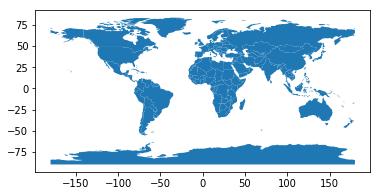

In [27]:
import geopandas 
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot()


In [28]:
 world = world[(world.pop_est>0)&(world.name!="Antarctica")]

In [ ]:
df_clean.corr()

In [ ]:
sns.heatmap(df_clean.corr())

In [ ]:
df_00

In [ ]:
#low_income_2000_df=df_00.loc[:,[i in low_income_2000 for i in df_00.columns]]
#world['Name'].loc[gdp['Category_2000'] =='Lower_middle_income'])

df_16.columns[4:]

In [ ]:
df_16.head()

In [ ]:
world.name in df_16.columns[4:]


In [ ]:
df_clean.loc[:,'General_cause':'high_income_2000'].groupby(["General_cause"]).agg("mean").plot.barh()


In [ ]:
df_clean.loc[:,['General_cause','low_income_2016','low_middle_income_2016','low_middle_income_2016','high_income_2016']].groupby(["General_cause"]).agg("mean").plot.barh()


In [ ]:
dfdf=df_clean[df_clean['General_cause']=="Cardiovascular diseases"]
dfdf.columns=['Cardiovascular diseases']
dfdf.iloc[2:].plot.barh()

In [ ]:
dfdf=df_clean[df_clean['General_cause']=="Cardiovascular diseases"]
dfdf.loc[:,['Sex','high_income_2016','high_income_2000']].groupby(['Sex']).agg('sum').plot.bar()

In [ ]:
dfdf=df_clean[df_clean['General_cause']=="Neonatal conditions"]
dfdf.loc[:,['Sex','low_income_2016','low_income_2000']].groupby(['Sex']).agg('sum').plot.bar()

In [ ]:
dfdf=df_clean[df_clean['General_cause']=="Cardiovascular diseases"]
dfdf.loc[:,['General_cause','low_income_2016','low_middle_income_2016','low_middle_income_2016','high_income_2016']].groupby(['Sex']).agg('sum').plot.bar()

In [ ]:

dfdf.loc[:,['General_cause','low_income_2000','low_middle_income_2000','low_middle_income_2000','high_income_2000']].groupby(['General_cause']).agg('sum').plot.barh()


In [ ]:
dfdf.loc[:,['General_cause','low_income_2016','low_middle_income_2016','low_middle_income_2016','high_income_2016']].groupby(['General_cause']).agg('sum').plot.barh()


In [70]:
import geopandas 
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


In [94]:
A = df_16.loc[:,'Afghanistan':'Zimbabwe'][df_16['General_cause']=="Cardiovascular diseases"]
B = A.sum(axis = 0, skipna = True) 
lst=[]
for i in world['name']:
    if i in B.index:        
            lst.append(B[i])
    
    else:
            lst.append(np.nan)
        
world['deaths']=lst

In [95]:
world=world.dropna(subset=["deaths"])

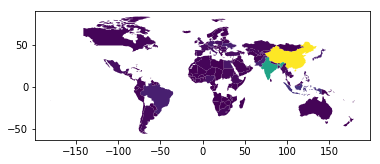

In [98]:

world.plot(column='deaths');